# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15656595788                   -0.60    5.9    191ms
  2   -11.16019509256       -2.44       -1.30    1.0    127ms
  3   -11.16039846030       -3.69       -2.32    2.4    136ms
  4   -11.16041612532       -4.75       -3.18    2.1    136ms
  5   -11.16041703385       -6.04       -3.44    2.7    143ms
  6   -11.16041704527       -7.94       -3.61    1.1    103ms
  7   -11.16041705022       -8.31       -3.95    1.0    105ms
  8   -11.16041705117       -9.02       -4.46    1.9    115ms
  9   -11.16041705142       -9.61       -4.94    2.1    129ms
 10   -11.16041705145      -10.56       -5.32    2.0    122ms
 11   -11.16041705145      -11.42       -5.68    1.6    129ms
 12   -11.16041705145      -12.25       -6.05    1.4    115ms


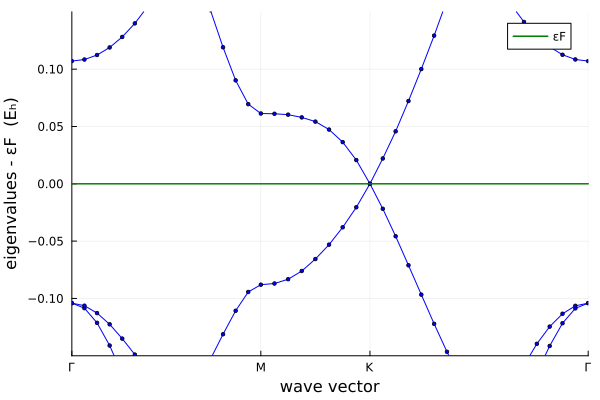

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_DFT(lattice, atoms, positions; functionals=PBE(), temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)